In [10]:
from utils.error.uncertainty import Uncertainty

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

from data.raw import raw_data

Set column names

In [11]:
col_names = ["Concentration (Mol NaCl)",
             "Average root count",
             "Average root count uncertainty",
             "Average root length (mm)",
             "Average root length uncertainty"]


Process raw data and their uncertainties

In [12]:
processed = {}

for k in raw_data:
    avg_root_count = Uncertainty.from_average(raw_data[k].count())
    avg_root_length = Uncertainty.from_average(np.mean(raw_data[k]))
    processed[float(k)] = [float(k),
                    avg_root_count.num,
                    avg_root_count.absolute,
                    avg_root_length.num,
                    avg_root_length.absolute]

Create and display dataframe

In [13]:
df = pd.DataFrame.from_dict(processed, columns=col_names, orient='index')\
    .fillna(0)

In [14]:
display(HTML(df.to_html(index=False)))

Concentration (Mol NaCl),Average root count,Average root count uncertainty,Average root length (mm),Average root length uncertainty
0.00,48.6,7.0,52.354636,7.0
0.08,30.0,9.0,20.461854,4.0
0.22,0.0,0.0,0.000000,0.0
0.36,0.0,0.0,0.000000,0.0
0.50,0.0,0.0,0.000000,0.0


Plot data

Text(0, 0.5, 'Root length (mm)')

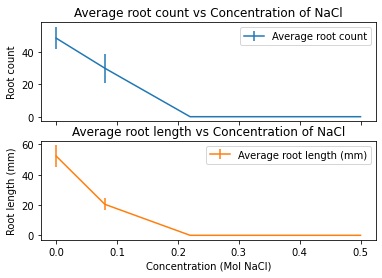

In [24]:
axes = df[["Average root count", "Average root length (mm)"]]\
    .plot(subplots=True,
          layout=(2,1),
          yerr=df[["Average root count uncertainty",
                   "Average root length uncertainty"]].values.T,
          title=["Average root count vs Concentration of NaCl",
                 "Average root length vs Concentration of NaCl"],
          sharex=True,
          xlabel="Concentration (Mol NaCl)")
axes[0][0].set_ylabel('Root count')
axes[1][0].set_ylabel('Root length (mm)')

In [16]:
plt.show()